For a moment, recall the Navier–Stokes equations for an incompressible fluid, where $\vec{v}$ represents the velocity field:

$$
\begin{align*}
\nabla \cdot\vec{v} &= 0 \\
\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v} &= -\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}
\end{align*}
$$


The first equation represents mass conservation at constant density. The second equation is the conservation of momentum. But a problem appears: the continuity equation for incompressble flow does not have a dominant variable and there is no obvious way to couple the velocity and the pressure. In the case of compressible flow, in contrast, mass continuity would provide an evolution equation for the density $\rho$, which is coupled with an equation of state relating $\rho$ and $p$.

In incompressible flow, the continuity equation $\nabla \cdot\vec{v}=0$ provides a *kinematic constraint* that requires the pressure field to evolve so that the rate of expansion $\nabla \cdot\vec{v}$ should vanish everywhere. A way out of this difficulty is to *construct* a pressure field that guarantees continuity is satisfied; such a relation can be obtained by taking the divergence of the momentum equation. In that process, a Poisson equation for the pressure shows up!

Step 10: 2D Poisson Equation
----
***

Poisson's equation is obtained from adding a source term to the right-hand-side of Laplace's equation:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$

So, unlinke the Laplace equation, there is some finite value inside the field that affects the solution. Poisson's equation acts to "relax" the initial sources in the field.

In discretized form, this looks almost the same as [Step 9](./12_Step_9.ipynb), except for the source term:

$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$

As before, we rearrange this so that we obtain an equation for $p$ at point $i,j$. Thus, we obtain:

$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$


We will solve this equation by assuming an initial state of $p=0$ everywhere, and applying boundary conditions as follows:

$p=0$ at $x=0, \ 2$ and $y=0, \ 1$

and the source term consists of two initial spikes inside the domain, as follows:

$b_{i,j}=100$ at $i=\frac{1}{4}nx, j=\frac{1}{4}ny$

$b_{i,j}=-100$ at $i=\frac{3}{4}nx, j=\frac{3}{4}ny$

$b_{i,j}=0$ everywhere else.

The iterations will advance in pseudo-time to relax the initial spikes. The relaxation under Poisson's equation gets slower and slower as they progress. *Why?*

### Self note
When solving partial differential equations (PDEs) like Poisson's equation numerically, iterative methods are often employed. These methods start with an initial guess and iteratively refine it to approach the true solution.

#### Iterative Relaxation Methods
Iterative methods such as Jacobi, Gauss-Seidel, and Successive Over-Relaxation (SOR) are commonly used to solve discretized versions of Poisson's equation. These methods update the solution at each grid point based on the values at neighboring points.

#### Pseudo-Time
In the context of iterative methods, "pseudo-time" refers to the iteration count rather than actual physical time. Each iteration can be thought of as a step in pseudo-time, gradually evolving the solution towards the steady-state.

#### Relaxation Process
The term "relaxation" refers to the process of smoothing out the initial guess to reach the equilibrium solution of the PDE. Here's how it works:
1. Initial Spikes: The initial guess for the solution may have large errors or "spikes" compared to the true solution.
2. Iteration: During each iteration, the solution is updated to reduce these errors. This process is akin to diffusion, where high-concentration areas (spikes) spread out to achieve a uniform distribution.
3. Convergence: Over many iterations, the solution gradually approaches the true solution, with the magnitude of the errors decreasing.

#### Slowing Down of Relaxation
As the iterations progress, the rate of convergence typically slows down. Here's why:
1. Error Reduction: Initially, large errors are reduced quickly because the differences between the initial guess and the true solution are significant. Each iteration makes substantial corrections.
2. Diminishing Returns: As the solution gets closer to the true solution, the remaining errors become smaller. The updates in each iteration become less impactful, leading to slower convergence.
3. Smoothing Effect: The iterative process has a smoothing effect similar to diffusion. Initially, sharp gradients (spikes) are smoothed out quickly. As the solution becomes smoother, further smoothing happens more slowly.

#### Mathematical Insight
The convergence rate of iterative methods can be analyzed using spectral properties of the iteration matrix. High-frequency components (sharp spikes) are damped out quickly, while low-frequency components (smooth variations) take longer to converge.

#### Practical Implications
1. Preconditioning: To accelerate convergence, preconditioning techniques can be used. These transform the problem into a form that converges faster.
2. Multigrid Methods: Multigrid methods address the issue of slow convergence by solving the problem on multiple scales, effectively speeding up the relaxation of both high and low-frequency components.

Example
Consider solving Poisson's equation on a 2D grid using the Jacobi method:
Initial Guess: Start with an initial guess for φ.
Update Rule: Update each grid point based on the average of its neighbors and the source term f.
Iteration: Repeat the update rule for many iterations.
Initially, the solution will change rapidly, reducing large errors. As the solution gets closer to the true solution, the changes per iteration become smaller, and the process slows down.
Conclusion
The relaxation process in iterative methods for solving Poisson's equation involves advancing in pseudo-time to smooth out initial spikes. The convergence slows down as the solution approaches the true steady-state due to the diminishing magnitude of errors and the inherent smoothing nature of the iterative updates. Understanding this behavior is crucial for effectively applying and optimizing numerical methods for solving PDEs


### Numerical instabilities
#### Sharp Gradients and Numerical Instability
When dealing with sharp pressure or temperature gradients in a domain, numerical methods can indeed struggle and potentially diverge from the correct solution. This is not exactly because the model is trying to reach a steady state quickly, but rather due to several interrelated factors:

1. Numerical Diffusion:
Numerical schemes, especially lower-order ones, can introduce artificial diffusion.
This numerical diffusion tends to ""smooth out sharp gradients"" more than the physical process would.
As a result, the solution can "smear" sharp features, leading to inaccuracies.

2. Discretization Error:
Sharp gradients require very fine spatial discretization to be accurately represented.
If the grid is too coarse, it may not capture the steep changes, leading to significant errors.

3. Stability Issues:
a. Sharp gradients can lead to large differences between adjacent grid points.
b. In explicit time-stepping schemes, this can violate the Courant-Friedrichs-Lewy (CFL) condition, causing instability and divergence.

4. Non-linear Effects:
In some cases, sharp gradients can trigger non-linear effects that are difficult for linear numerical schemes to handle.

5. Oscillations:
Some numerical schemes, when encountering sharp gradients, can produce spurious oscillations (e.g., Gibbs phenomenon).
These oscillations can grow and lead to divergence.

#### Why It's Not About Reaching Steady State Quickly
The issue isn't that the model is trying to reach a steady state too quickly. Instead:
1. Time Scale Mismatch:
The numerical scheme may not be able to resolve the "fast dynamics associated with sharp gradients".
This can lead to errors accumulating over time, rather than a rush to steady state.

2. Physical vs. Numerical Behavior:
The numerical method should ideally mimic the physical behavior of the system.
If it introduces excessive damping or diffusion, it's not accurately representing the physics, regardless of how quickly it reaches a "steady state."

### Strategies to Address This Issue
To handle sharp gradients more accurately:
1. Adaptive Mesh Refinement:
Use finer grid resolution in areas of sharp gradients.

2. Higher-Order Schemes:
Employ higher-order numerical methods that can better capture steep gradients.

3. Flux Limiters:
In the context of fluid dynamics, use flux limiters to prevent spurious oscillations near discontinuities.

4. Implicit Methods:
For stiff problems with widely varying time scales, implicit methods can be more stable.

5. Non-linear Solvers:
If the problem is inherently non-linear, use appropriate non-linear solvers.

6. Physical Regularization:
Sometimes, adding physically-motivated smoothing terms can help stabilize the solution without compromising accuracy.

Conclusion
The challenge with sharp gradients is not about the model trying to reach steady state quickly, but rather about the numerical method's ability to accurately represent and evolve these sharp features. The key is to choose and implement numerical methods that can faithfully capture the physics of the problem, including any sharp gradients, without introducing excessive numerical artifacts or instabilities.

100%|██████████| 100/100 [00:00<00:00, 6009.72it/s]


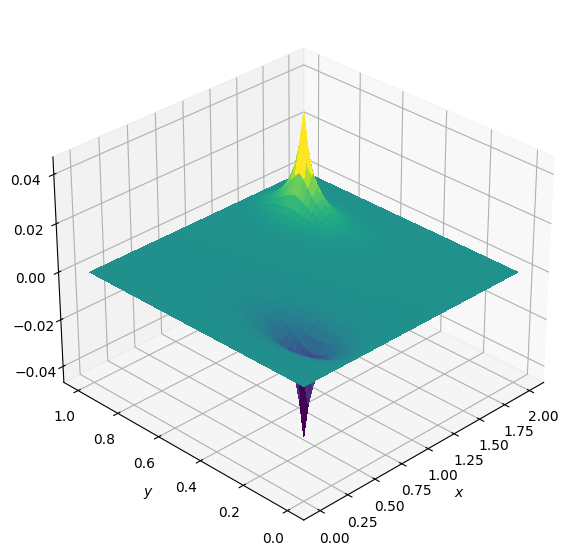

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, cm
from tqdm import tqdm

from difference_equations import DiscretizationSchemes
from grid import MeshGrid
from input_variables import *
from matrix_init import MatrixInitializer
from physics import *
from test import TestStability
from visualization import Visual

def main ():
    params = SetupParameters(nx = 50, ny = 50, nppi = 100, lx = 2, ly = 1)
    p_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    p_prev[-1,:] = 0
    p_prev[0,:] = 0
    p_prev[:,0] = 0
    p_prev[:,-1] = 0
    
    # source term
    b_i_j = MatrixInitializer.matrix_initialization(params.nx,params.ny,zero_initialization=True)
    b_i_j[int(params.ny / 4), int(params.nx / 4)]  = 100
    b_i_j[int(3 * params.ny / 4), int(3 * params.nx / 4)] = -100
    
    p_tent = PressurePoisson.laplace_poisson_pressure_2d(p_prev, b_i_j, params.dx, params.dy, params.nx, params.ny, params.nppi)
    
    # def plot2D(x, y, p):
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    # X, Y = np.meshgrid(x, y)
    X, Y, dx, dy = MeshGrid.mesh(params.nx, params.ny, params.lx, params.ly)
    surf = ax.plot_surface(X, Y, p_tent[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

if __name__ == "__main__":
    main()